## Fetching the Data

In [161]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" 

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [162]:
 fetch_housing_data()

In [163]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [164]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [165]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [166]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [167]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


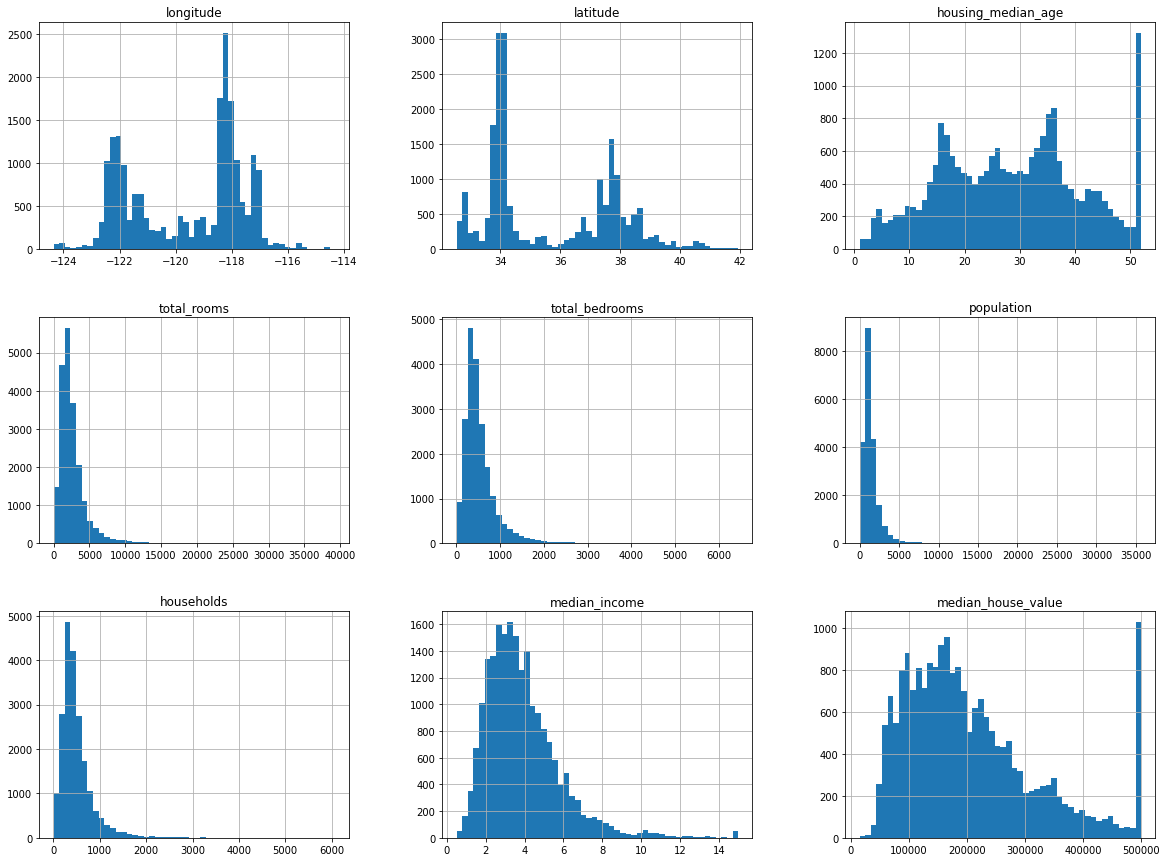

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Creating Train and Test Set

In [169]:
import numpy as np
np.random.seed(42)

In [170]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [171]:
train_set, test_set = split_train_test(housing, 0.2)

In [172]:
len(train_set)

16512

In [173]:
len(test_set)

4128

<AxesSubplot:>

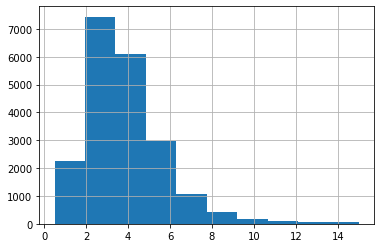

In [174]:
housing["median_income"].hist()

In [175]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

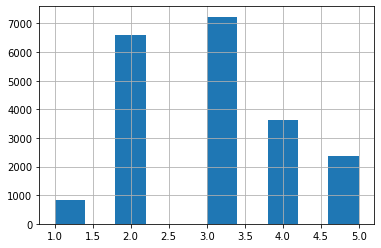

In [176]:
housing["income_cat"].hist()

In [177]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [178]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [179]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualize the Data

In [180]:
housing = strat_train_set.copy()

In [181]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

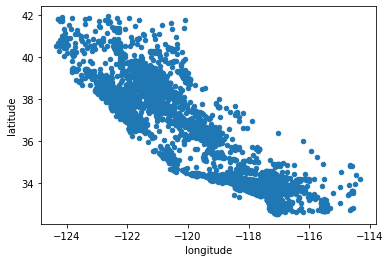

In [182]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

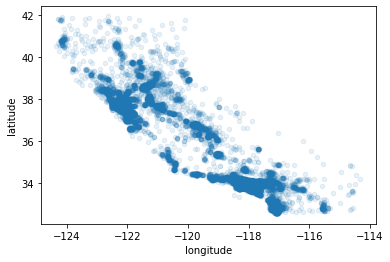

In [183]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

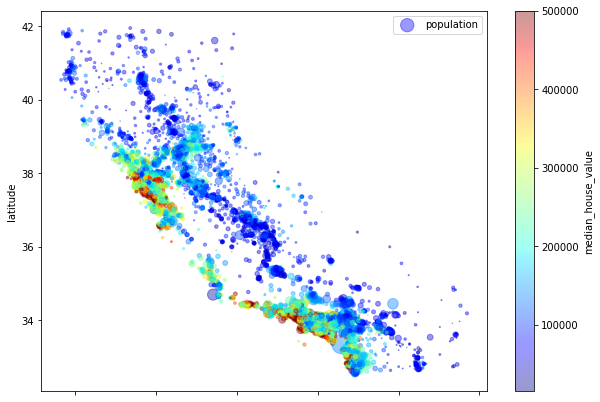

In [184]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Correlation

In [185]:
corr_matrix = housing.corr()

In [186]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

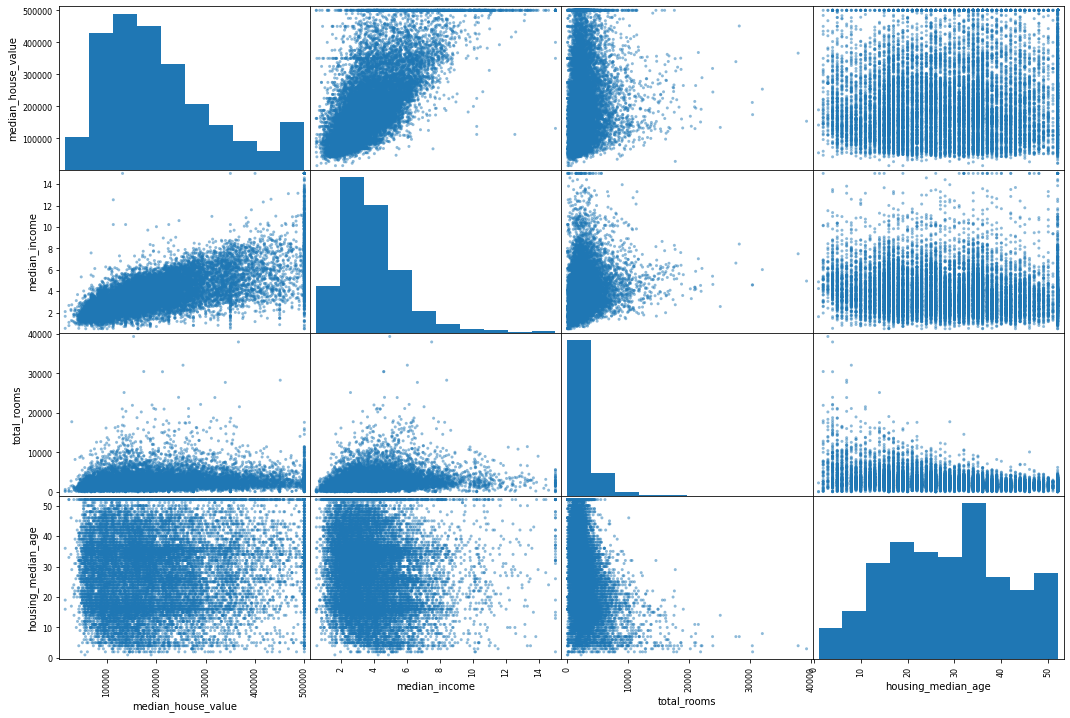

In [187]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(18, 12))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

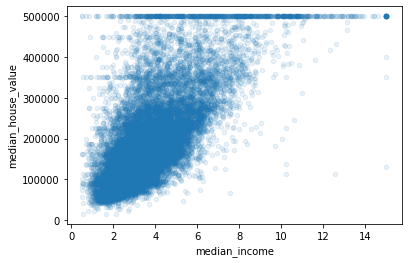

In [188]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

## Experimenting with Attribute Combinations

In [189]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [190]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [191]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

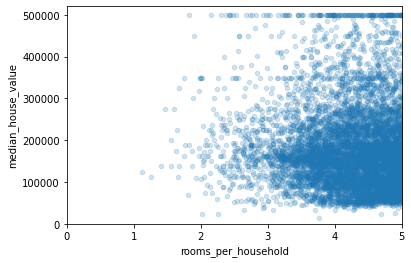

In [192]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the Data for Machine Learning Algorithms

In [193]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [194]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [195]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

## Data Cleaning

In [196]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [197]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [198]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [199]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [200]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [201]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

### Transform the training set:

In [202]:
X = imputer.transform(housing_num)

In [203]:
imputer.strategy

'median'

#### Creating a New DataFrame with transformed Values

In [204]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [205]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


#### Alternative Way of Removing the Missing Values

In [40]:
housing['total_bedrooms'].isna().sum()

158

In [ ]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

## Handling Text and Categorical Attributes

In [206]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Using OneHot Encoder because the Categorical attribute doesn't seems to have Ordinal Relation

In [207]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [208]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [209]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Manual Transformation Adding New Atrributes

In [210]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

## Transformation Pipelines

In [211]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,0.182692,3.167241


In [212]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [213]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [214]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
        -0.12248362,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.91166333, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.3709391 , -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
         0.38551382, -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.50680849, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
        -0.12314147,  0.00657083]])

In [215]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [216]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [217]:
housing_prepared.shape

(16512, 16)

## Select and Train a Model

### Training and Evaluating on the Training Set

In [218]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [219]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 83648.54287152 305815.0882093  150013.37994426 188096.42566946
 241840.13952577]


In [220]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


## RMSE

In [221]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_mse

68160.92435491859

In [222]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49058.88337935068

## Decision Tree

In [223]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [224]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_mse

0.0

## Better Evaluation Using Cross-Validation

In [225]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [226]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71918.58642103 71384.84501617 68633.80280963 69659.52488314
 67941.65145966 75921.07007104 71837.53328882 72468.1641427
 68601.96049537 68323.32006781]
Mean: 70669.045865536
Standard deviation: 2379.810209113841


In [227]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71181.95098096 63825.56512744 67741.07241029 68256.29685279
 66711.2271161  72240.73664717 69981.07976999 68438.51358706
 65946.92067317 70073.85093767]
Mean: 68439.7214102642
Standard deviation: 2408.8928462974686


### Random Forest 

In [228]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [229]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse

18643.965321178945

In [230]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51468.67431659 48558.10945101 46944.27789502 51886.63016622
 47662.87497687 51383.51857789 52459.08101362 50123.08324218
 48713.72491549 54195.07949047]
Mean: 50339.50540453655
Standard deviation: 2206.1714766286996


In [231]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68439.721410
std       2539.196011
min      63825.565127
25%      66968.688440
50%      68347.405220
75%      70050.658146
max      72240.736647
dtype: float64

### Support Vector Regression

In [232]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
svm_rmse

110981.54965314854

## Fine-Tune Your Model

### Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [120]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [121]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65119.22597571509 {'max_features': 2, 'n_estimators': 3}
55223.5947809774 {'max_features': 2, 'n_estimators': 10}
52786.159328222646 {'max_features': 2, 'n_estimators': 30}
60681.200130349374 {'max_features': 4, 'n_estimators': 3}
52490.03868445132 {'max_features': 4, 'n_estimators': 10}
50472.09736091612 {'max_features': 4, 'n_estimators': 30}
58333.75312490932 {'max_features': 6, 'n_estimators': 3}
51766.98839356613 {'max_features': 6, 'n_estimators': 10}
49882.96011935094 {'max_features': 6, 'n_estimators': 30}
59288.94215890149 {'max_features': 8, 'n_estimators': 3}
52040.865576692486 {'max_features': 8, 'n_estimators': 10}
49985.97352309603 {'max_features': 8, 'n_estimators': 30}
63210.50747680449 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54510.12433444709 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58152.56594870564 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51810.53293480496 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

### Randomized Search

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa6adac13a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa6aca18640>},
                   random_state=42, scoring='neg_mean_squared_error')

In [124]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49114.27375781033 {'max_features': 7, 'n_estimators': 180}
51989.40734996994 {'max_features': 5, 'n_estimators': 15}
50664.19236975945 {'max_features': 3, 'n_estimators': 72}
50888.041927500206 {'max_features': 5, 'n_estimators': 21}
49239.793066989776 {'max_features': 7, 'n_estimators': 122}
50610.63298853303 {'max_features': 3, 'n_estimators': 75}
50449.32879015504 {'max_features': 3, 'n_estimators': 88}
49565.46468502582 {'max_features': 5, 'n_estimators': 100}
50186.73933503331 {'max_features': 3, 'n_estimators': 150}
65168.96704835087 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [125]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.69973806e-02, 7.00351211e-02, 4.19508377e-02, 1.72928616e-02,
       1.72956635e-02, 1.78824437e-02, 1.64855146e-02, 3.26982327e-01,
       4.97468264e-02, 8.47983613e-02, 1.04610459e-01, 1.60147674e-02,
       1.51555966e-01, 7.55747095e-05, 3.25555065e-03, 5.02034486e-03])

In [126]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.326982327162615, 'median_income'),
 (0.1515559659408615, 'pop_per_hhold'),
 (0.10461045889757281, 'population_per_household'),
 (0.08479836130519176, 'bedrooms_per_room'),
 (0.07699738055141943, 'longitude'),
 (0.07003512112918531, 'latitude'),
 (0.049746826352699065, 'rooms_per_household'),
 (0.041950837711577045, 'housing_median_age'),
 (0.01788244367196627, 'population'),
 (0.017295663459248437, 'total_bedrooms'),
 (0.017292861637860507, 'total_rooms'),
 (0.01648551458288839, 'households'),
 (0.01601476737636536, 'rooms_per_hhold'),
 (0.005020344860294099, 'INLAND'),
 (0.00325555065072949, '<1H OCEAN'),
 (7.55747095254322e-05, 'bedrooms_per_room')]

## Evaluate Your System on the Test Set

In [132]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [133]:
X_test["rooms_per_household"] = X_test["total_rooms"]/X_test["households"]
X_test["bedrooms_per_room"] = X_test["total_bedrooms"]/X_test["total_rooms"]
X_test["population_per_household"]= X_test["population"]/X_test["households"]

In [134]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

In [135]:
final_rmse

47381.57931049578

In [136]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45433.88696887, 49252.30990333])

In [137]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45433.88696886976, 49252.30990332909)

# 1

Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.8s
[CV] END .............................C=100.0, kernel=linear; total time=   4.6s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   7.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   7.5s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   7.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   7.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   7.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   7.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   7.6s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   7.7s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   7.3s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   7.2s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   7.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.6s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.1s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.1s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.2s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [139]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

69563.09487894495

The RMSE Score is not better than Randomforest Regressor and the best hyperparameters found:

In [140]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

# 2

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.8s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   9.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   9.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   9.1s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   6.5s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   6.7s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   6.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   3.9s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.3s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.3s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.4s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.4min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.2min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.3min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=   4.4s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.6s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.6s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.6s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.7s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.8s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.6s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.4s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.4s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.7s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa6a3e5ac70>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa6a3e58880>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [142]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54670.971775874925

This is much closer to the performance of the RandomForestRegressor

In [144]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

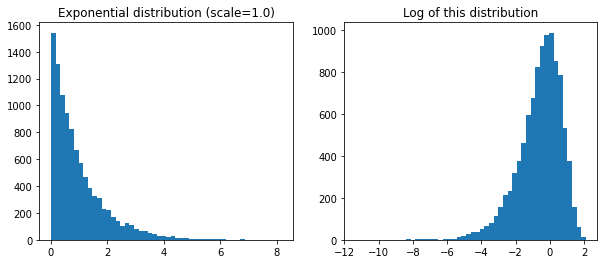

In [145]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

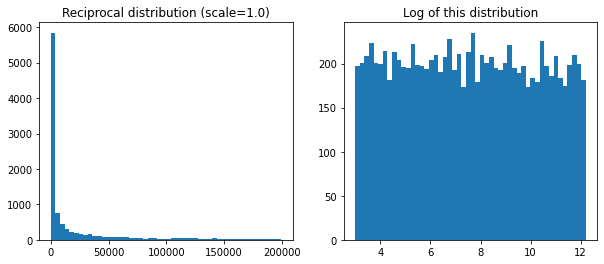

In [146]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

# 3

### Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [147]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [148]:
k = 5

In [149]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [150]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'bedrooms_per_room',
       'population_per_household', 'pop_per_hhold'], dtype='<U24')

In [151]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.326982327162615, 'median_income'),
 (0.1515559659408615, 'pop_per_hhold'),
 (0.10461045889757281, 'population_per_household'),
 (0.08479836130519176, 'bedrooms_per_room'),
 (0.07699738055141943, 'longitude')]

#### create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection

In [152]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [153]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [154]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 , -0.12248362,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  , -0.91166333, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.3709391 , -0.07537122,  1.        ]])

In [155]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 , -0.12248362,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  , -0.91166333, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.3709391 , -0.07537122,  1.        ]])

# 4 

### Try creating a single pipeline that does the full data preparation plus the final prediction

In [156]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [157]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedro

In [158]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 82700.67249676 289993.49775958  94994.0476822  149567.31591275]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


# 5

### Automatically explore some preparation options using GridSearchCV

In [159]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   7.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.7s
[CV] END feat

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  15.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  13.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  14.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  15.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  13.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  15.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  16.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  12.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  15.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  13.1s
[CV] END feat

/home/pragathieshwaran/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pragathieshwaran/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pragathieshwaran/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/pragathieshwaran/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                               

In [160]:
grid_search_prep.best_params_

{'feature_selection__k': 13, 'preparation__num__imputer__strategy': 'median'}